# **Lab 2.1 Image Enhancement with Math Operation**
This lab consists of two main subparts: Image Pixel Adjustment using Linear Equations and Gamma Equations.

In [13]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import ImageGrid
import os
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

Read an image using OpenCV (Use your own image).

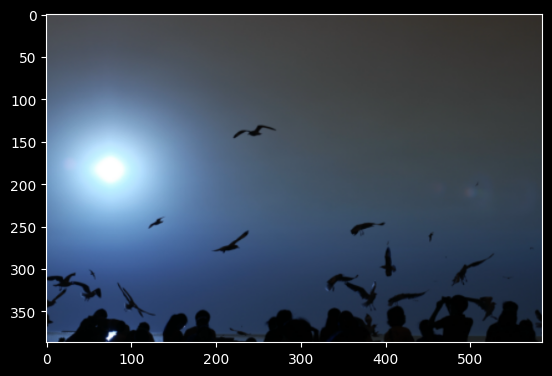

In [14]:
### START CODE HERE ###
img = cv2.imread("ori.png")

plt.imshow(img)
### END CODE HERE ###

## **Image Pixel Adjustment**

### Using Linear Equation
$$I_{new} = I \cdot a + b$$

Please perform at ***least 20 iterations*** with varying values of $a$ and $b$.
Assign the result of each iteration to an array.<br/>

In [15]:
### START CODE HERE ###
a = 0
b = 0
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
lin_result = []


# def quantize(img, bit_dept, a, b):
#     quantized_img = img.copy()
    
#     Qlevel = pow(2, bit_dept - 1)
#     Smax = 255 * a + b
#     Smin = b

#     if Smax != 0:
#         quantized_img = np.floor(((img.astype(np.float32) - Smin) / (Smax - Smin)) * Qlevel).astype(np.uint8)
            
#     return quantized_img

for i in range(40):
    adjusted_img = RGB_img.astype(np.float32) * a + b
    adjusted_img = np.clip(adjusted_img, 0, 255).astype(np.uint8)
    # adjusted_img = quantize(adjusted_img, 8, a, b)
    lin_result.append(adjusted_img)
    a += 0.1
    b = i * 3


### END CODE HERE ###

Plot the images in a grid as shown below. Using `ImageGrid`.
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical
- The reference output used 40 iterations.

![image-2.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/Image-Processing-Course-2025/main/Lab2_Image-Enhancement/assets/1-1.png?raw=true)
</details>


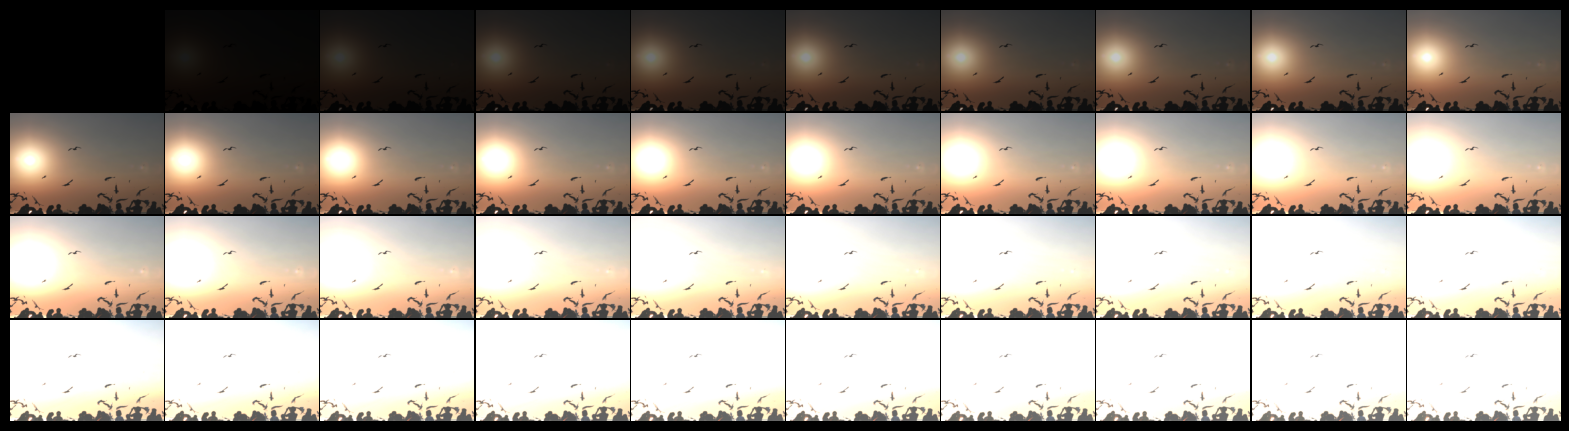

In [16]:
### START CODE HERE ###

fig = plt.figure(figsize=(20, 6))
grid = ImageGrid(fig, rect=111 , nrows_ncols=(4, 10))

for i, ax in enumerate(grid):
    im = ax.imshow(lin_result[i])
    ax.set_axis_off()
        
plt.show()
### END CODE HERE ###

If you code work properly, the cell below should run without error.

In [17]:
assert len(lin_result) >= 20, f"Expected more than or equal 20 iterations but got {len(lin_result)}"
for idx, result in enumerate(lin_result):
    assert result.shape == img.shape, f"Shape mismatch at index {idx}. Expected {img.shape} but got {result.shape}"
    assert result.dtype == np.uint8, f"Data type mismatch at index {idx}. Expected uint8 but got {result.dtype}"
    assert np.all((result >= 0) & (result <= 255)), f"Pixel value out of bounds at index {idx}"

Save the array of images to a video. Please complete the function below.

In [18]:
### START CODE HERE ###
def write_images_to_video(image_array, output_file, frame_rate=30):
    (h, w) = image_array[0].shape[:2]

    fourcc = cv2.VideoWriter_fourcc(*"MP4V")
    out = cv2.VideoWriter(output_file, fourcc, frame_rate, (h, w))
    
    for img in image_array:
        out.write(img)
        
### END CODE HERE ###

Use `write_images_to_video()` and save the result.

In [19]:
output_folder = "output"
os.makedirs(output_folder, exist_ok=True)

output_file =  os.path.join(output_folder, "output_linear.mp4")
write_images_to_video(lin_result,output_file)

Now use `matplotlib.animation` to display the animation from the images array.

In [20]:
%%capture
### START CODE HERE ###

fig, ax = plt.subplots(1, 1, figsize=(6, 4))

frames = []

for img in lin_result:
    artist = ax.imshow(img, animated=True)
    ax.set_axis_off()
    frames.append([artist])

ani = animation.ArtistAnimation(fig, frames, interval=100, blit=False, repeat=True)
ani.save("output.gif", writer='pillow')

### END CODE HERE ###

<details>
<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![linear.gif](![<attachment:linear (2).gif>](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/Image-Processing-Course-2025/main/Lab2_Image-Enhancement/assets/linear.gif?raw=true))

</details>

In [21]:
display(HTML(ani.to_jshtml()))

### Gamma Equation
$$I_{new} = I^{\gamma} \cdot a + b$$

Where $a$ is 1 and $b$ is 0. 
Please perform ***at least 10 iterations*** for 0 < $\gamma$ < 1 and another ***at least 10 iterations*** for $\gamma$ > 1
Assign the result of each iteration to an array.<br/>


In [46]:
### START CODE HERE ###
a = 1
b = 0
gamma = 0.1

gam_result = []

for i in range(20):
    
    gamma_img = (RGB_img.astype(np.float32)**gamma)
    
    gamma_img = np.clip(gamma_img, 0, 255).astype(np.uint8)
    gam_result.append(gamma_img)
    gamma += 0.1

### END CODE HERE ###

Plot the images in a grid as shown below. Using `ImageGrid`.
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image-2.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/Image-Processing-Course-2025/main/Lab2_Image-Enhancement/assets/1-2.png?raw=true)
</details>

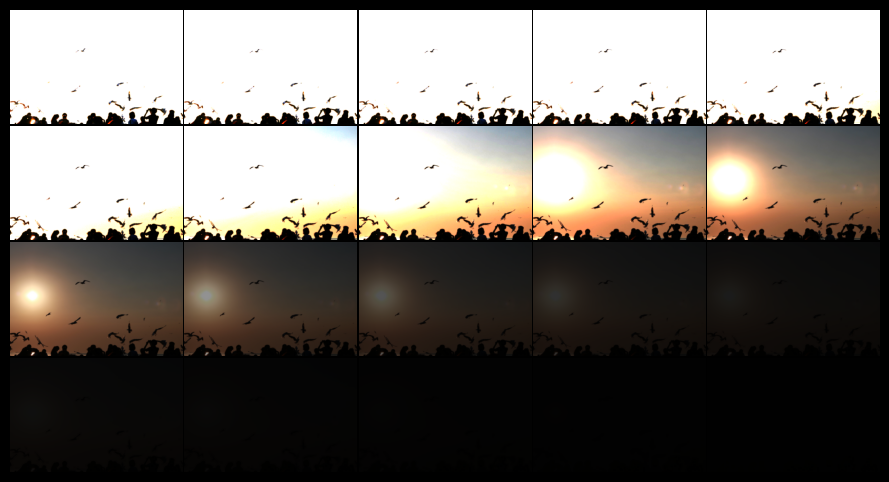

In [47]:
### START CODE HERE ###

fig = plt.figure(figsize=(20, 6))
grid = ImageGrid(fig, rect=111 , nrows_ncols=(4, 5))

for i, ax in enumerate(grid[::-1]):
    im = ax.imshow(gam_result[i])
    ax.set_axis_off()
        
plt.show()
### END CODE HERE ###

In [48]:
assert len(gam_result) >= 20, f"more than or equal 20 iterations but got {len(gam_result)}"
for idx, result in enumerate(gam_result):
    assert result.shape == img.shape, f"Shape mismatch at index {idx}. Expected {img.shape} but got {result.shape}"
    assert result.dtype == np.uint8, f"Data type mismatch at index {idx}. Expected uint8 but got {result.dtype}"
    assert np.all((result >= 0) & (result <= 255)), f"Pixel value out of bounds at index {idx}"

Use `write_images_to_video()` and save the result.

In [49]:
output_folder = "output"
os.makedirs(output_folder, exist_ok=True)

output_file =  os.path.join(output_folder, "output_gamma.mp4")
write_images_to_video(gam_result,output_file)

Now use `matplotlib.animation` to display the animation from the images array.

In [56]:
%%capture
### START CODE HERE ###

fig, ax = plt.subplots(1, 1, figsize=(6, 4))

frames = []

for img in gam_result[::-1]:
    artist = ax.imshow(img, animated=True)
    ax.set_axis_off()
    frames.append([artist])

ani = animation.ArtistAnimation(fig, frames, interval=100, blit=False, repeat=True)
ani.save("output_gamma.gif", writer='pillow')

### END CODE HERE ###

<details>
<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![gamma2.gif](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/Image-Processing-Course-2025/main/Lab2_Image-Enhancement/assets/gamma.gif?raw=true)

</details>

In [57]:
display(HTML(ani.to_jshtml()))

---

## **Questions**
1. If an image having over brightness or saturation, what would be possible solutions to enhance the image.
2. How can we make an image reverse intensity (black-to-white, white-to-black)? Explain the process